In [ ]:
'''
Lung & Colon Cancer Image Classification - CNN Model

- Type: Colon
- Classes: 2 (benign, adenocarcinoma)
- Num Epochs: 15
- Image Augmentation w/ fill_mode=reflect.
- Accuracy: 95% (train, validation, test)
'''

In [1]:
import os
import random
import tensorflow as tf

In [2]:
TRAIN_PATH = "colonTrain-paper"
VALID_PATH = "colonValid-paper"
TEST_PATH = "colonTest-paper"

In [3]:
image_data = tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode = 'reflect'
    )

In [4]:
image_data1 = tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1./255,
    )

In [9]:
img_size = 150
batch_size = 32

# grayscale will only have 1 image channel
train = image_data.flow_from_directory(TRAIN_PATH, target_size=(img_size,img_size), 
                                       batch_size=batch_size, color_mode='rgb', shuffle = True)

val = image_data1.flow_from_directory(VALID_PATH, target_size=(img_size,img_size), 
                                     batch_size=batch_size, color_mode='rgb', shuffle = True)

Found 8000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


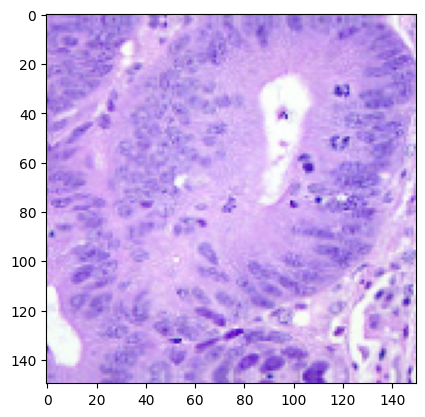

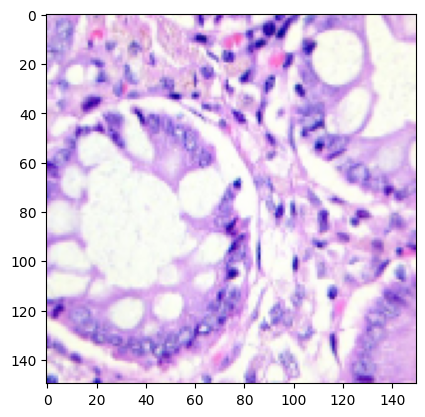

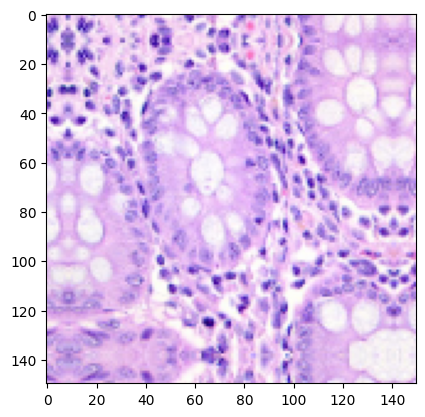

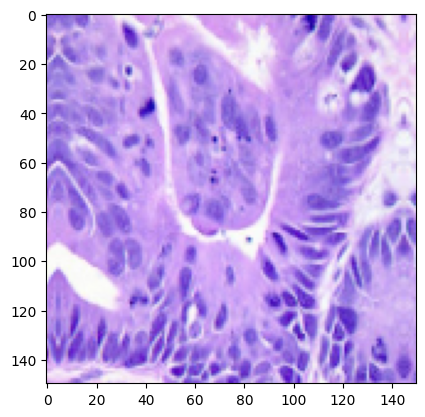

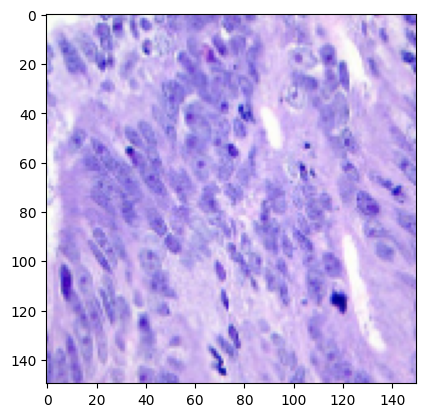

In [11]:
import matplotlib.pyplot as plt
for _ in range(5):
    img, label = train.next()
    plt.imshow(img[0])
    plt.show()

In [14]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(150, 150 ,3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(rate=0.4),
        tf.keras.layers.Dense(2)
    ])

In [15]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4),
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 18, 18, 64)      

In [17]:
history = model.fit(train, epochs=15, verbose = 1, validation_data=val)

Epoch 1/15
250/250 [==============================] - 142s 567ms/step - loss: 0.5521 - accuracy: 0.7153 - val_loss: 0.4134 - val_accuracy: 0.8180
Epoch 2/15
250/250 [==============================] - 148s 590ms/step - loss: 0.4032 - accuracy: 0.8186 - val_loss: 0.3556 - val_accuracy: 0.8420
Epoch 3/15
250/250 [==============================] - 149s 596ms/step - loss: 0.3415 - accuracy: 0.8496 - val_loss: 0.5192 - val_accuracy: 0.7540
Epoch 4/15
250/250 [==============================] - 146s 582ms/step - loss: 0.2974 - accuracy: 0.8729 - val_loss: 0.4396 - val_accuracy: 0.8110
Epoch 5/15
250/250 [==============================] - 143s 573ms/step - loss: 0.2636 - accuracy: 0.8906 - val_loss: 0.4913 - val_accuracy: 0.8080
Epoch 6/15
250/250 [==============================] - 141s 562ms/step - loss: 0.2286 - accuracy: 0.9070 - val_loss: 0.2957 - val_accuracy: 0.8840
Epoch 7/15
250/250 [==============================] - 139s 554ms/step - loss: 0.2094 - accuracy: 0.9175 - val_loss: 0.1842 -

In [18]:
test = image_data1.flow_from_directory(TEST_PATH, target_size=(img_size,img_size), 
                                     batch_size=1, color_mode='rgb', shuffle = True)

Found 1000 images belonging to 2 classes.


In [19]:
acc = model.evaluate(test)
print(f'The test set accuracy is {acc}\%.')

1000/1000 [==============================] - 13s 13ms/step - loss: 0.1142 - accuracy: 0.9540
The test set accuracy is [0.11415795981884003, 0.9539999961853027]\%.


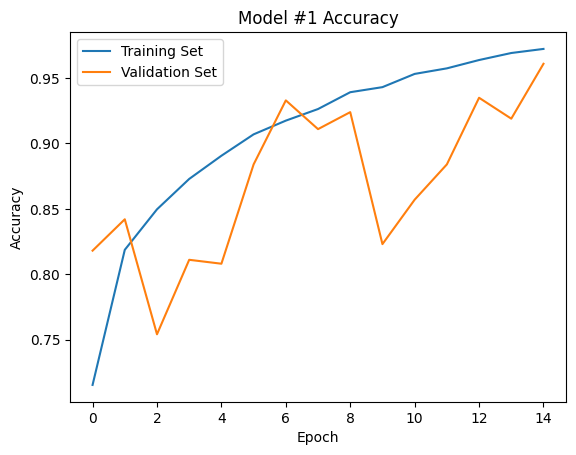

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as img

plt.title('Model #1 Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Set','Validation Set'], loc='upper left')

plt.show()

In [21]:
# Visualizing Feature Maps - Step 1) print out the dimensions of the conv layers
# Source: https://www.kaggle.com/code/arpitjain007/guide-to-visualize-filters-and-feature-maps-in-cnn

for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

0 conv2d_6 (None, 150, 150, 32)
2 conv2d_7 (None, 75, 75, 64)
4 conv2d_8 (None, 37, 37, 64)


In [22]:
# create new model w/ output being the output of a given convolutional layer
model1 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[0].output)

In [23]:
img, label = test.next()
features = model1.predict(img)

print(features.shape)

1/1 [==============================] - 0s 116ms/step
(1, 150, 150, 32)


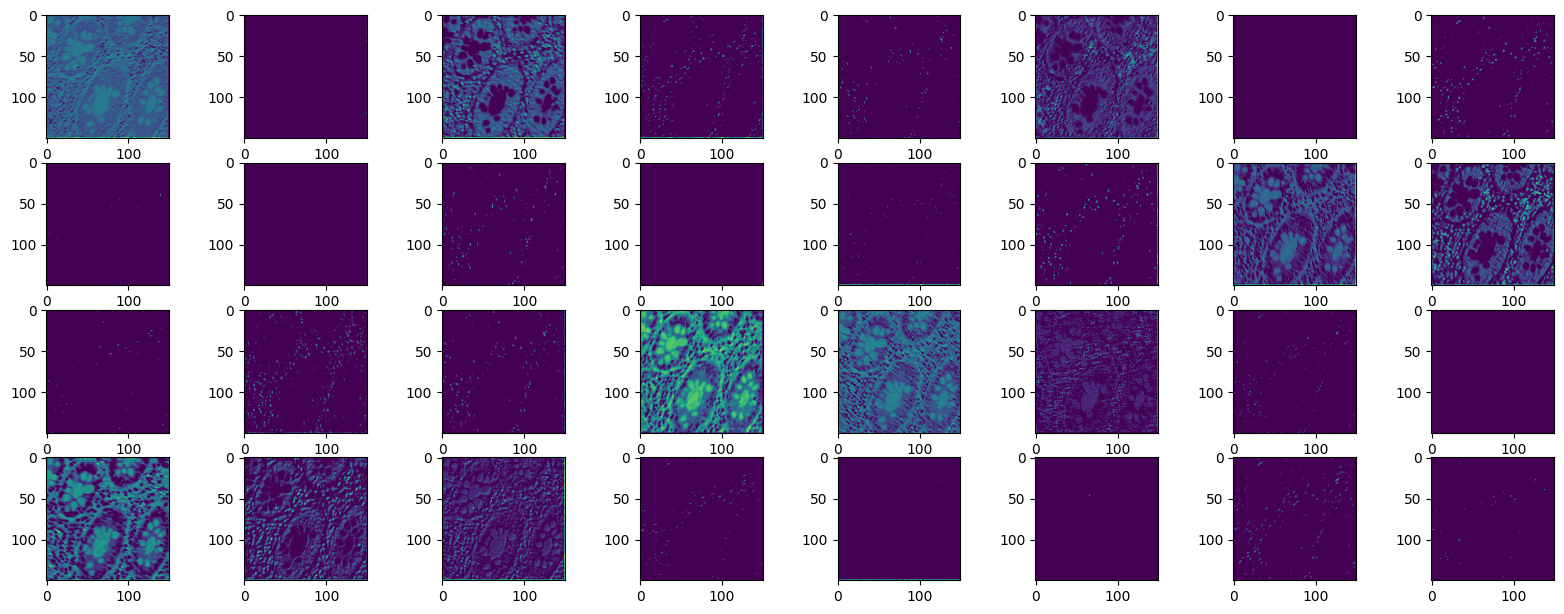

In [24]:
fig = plt.figure(figsize=(20,15))

for i in range(1,features.shape[3]+1):
    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1])
    
plt.show()

1/1 [==============================] - 0s 56ms/step
(1, 75, 75, 64)


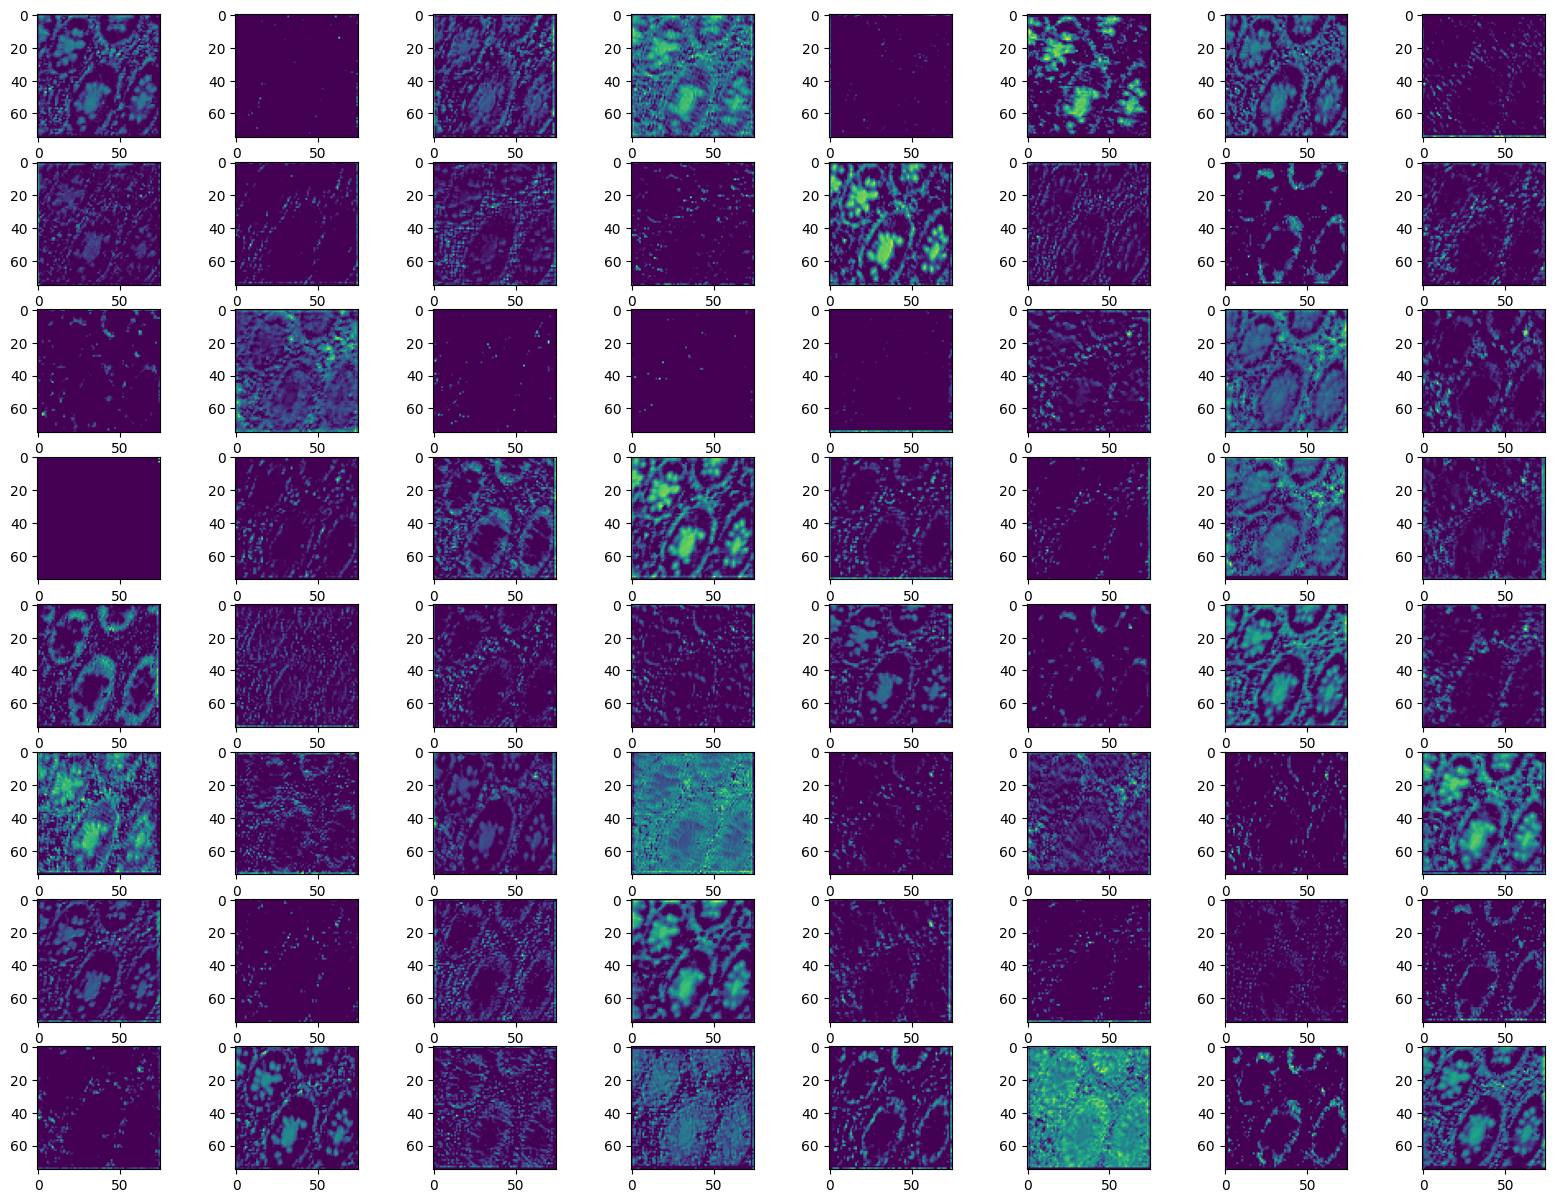

In [25]:
model2 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[2].output) #2nd conv layer

features2 = model2.predict(img)
print(features2.shape)

fig = plt.figure(figsize=(20,15))

for i in range(1,features2.shape[3]+1):
    plt.subplot(8,8,i)
    plt.imshow(features2[0,:,:,i-1])
    
plt.show()

1/1 [==============================] - 0s 67ms/step
(1, 37, 37, 64)


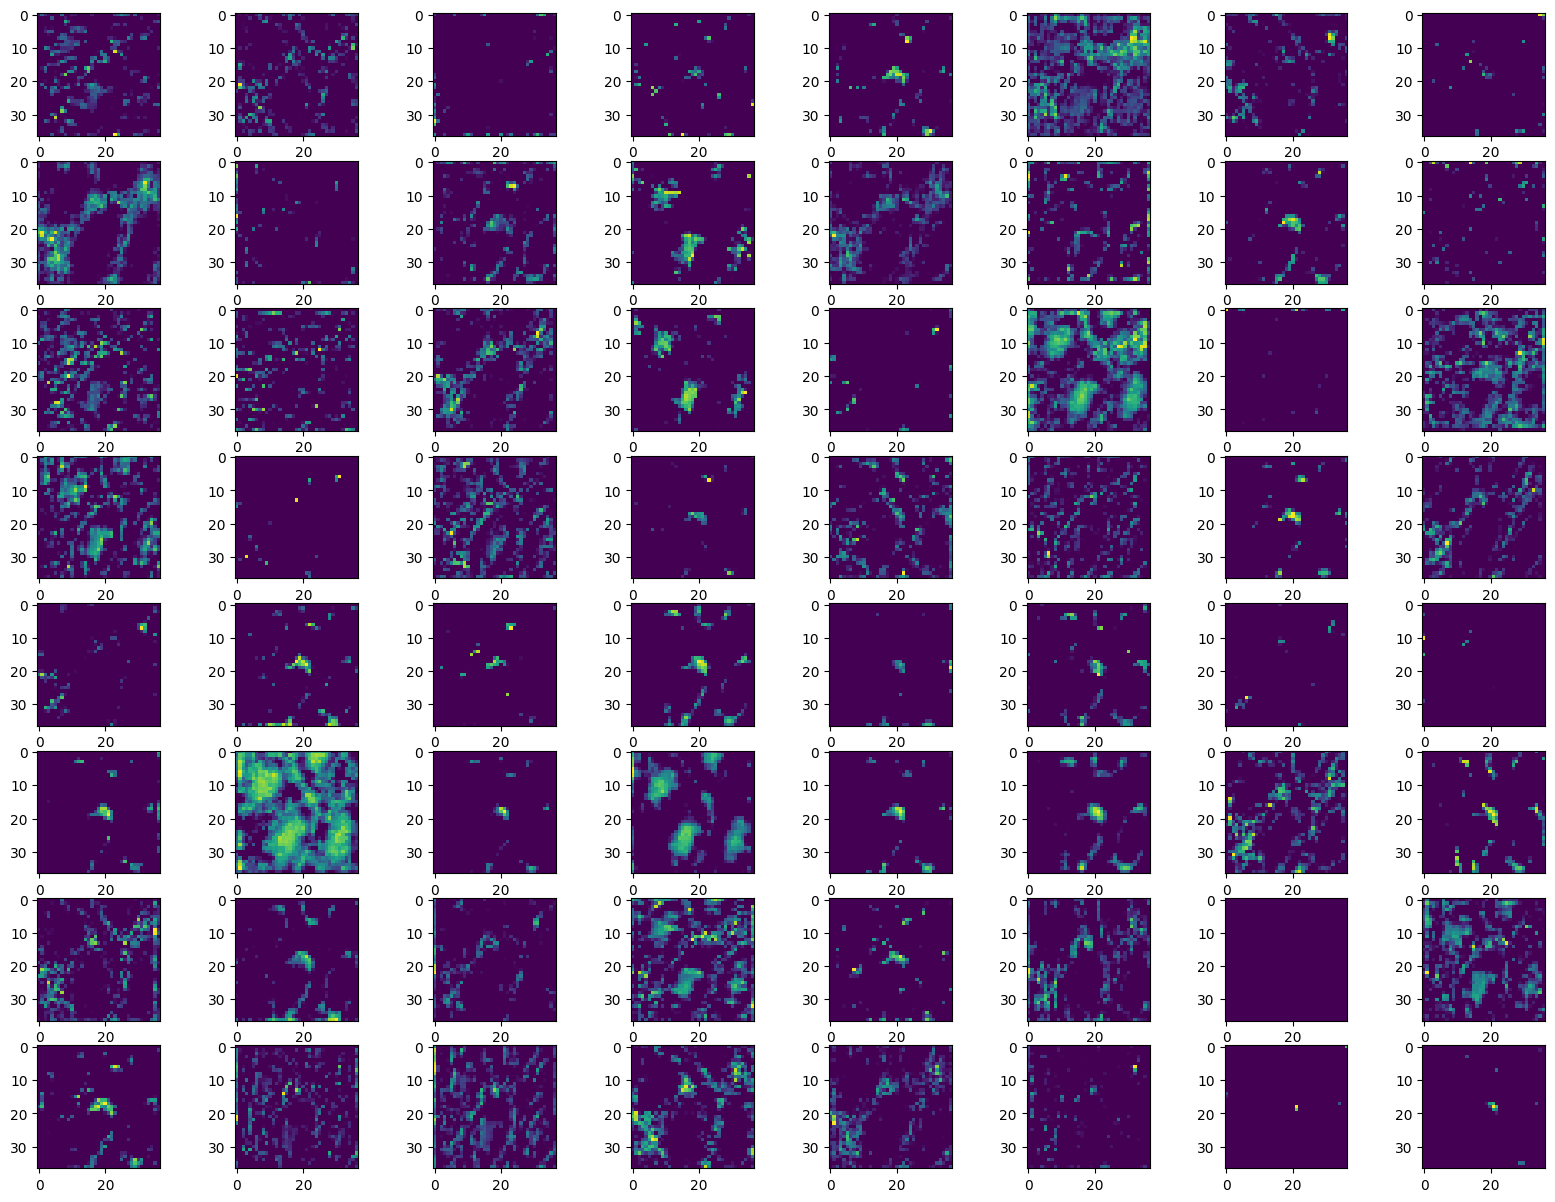

In [26]:
model3 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[4].output) #3rd conv layer

features3 = model3.predict(img)
print(features3.shape)

fig = plt.figure(figsize=(20,15))

for i in range(1,features3.shape[3]+1):
    plt.subplot(8,8,i)
    plt.imshow(features3[0,:,:,i-1])
    
plt.show()

1/1 [==============================] - 0s 25ms/step


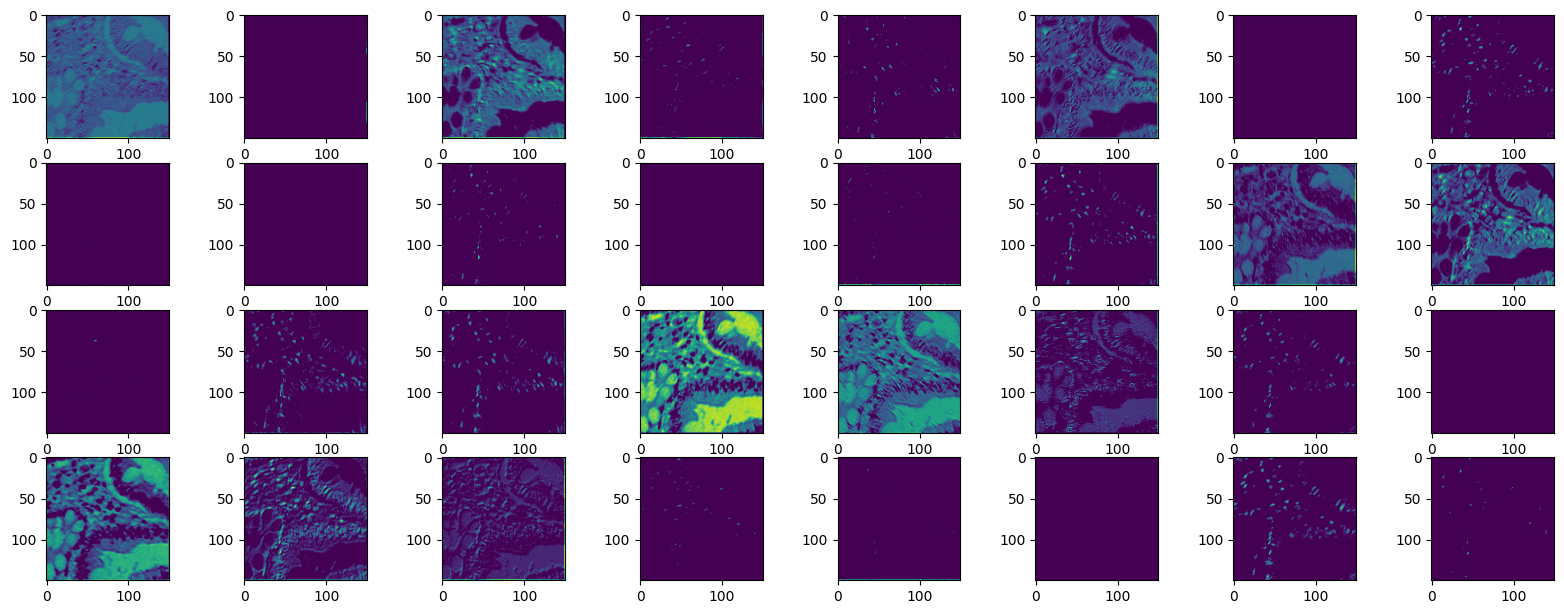

In [27]:
# another image - edge/boundary detection + high-level pictures
img1, label = test.next()
featuresA1 = model1.predict(img1)

fig = plt.figure(figsize=(20,15))

for i in range(1,featuresA1.shape[3]+1):
    plt.subplot(8,8,i)
    plt.imshow(featuresA1[0,:,:,i-1])
    
plt.show()

1/1 [==============================] - 0s 23ms/step


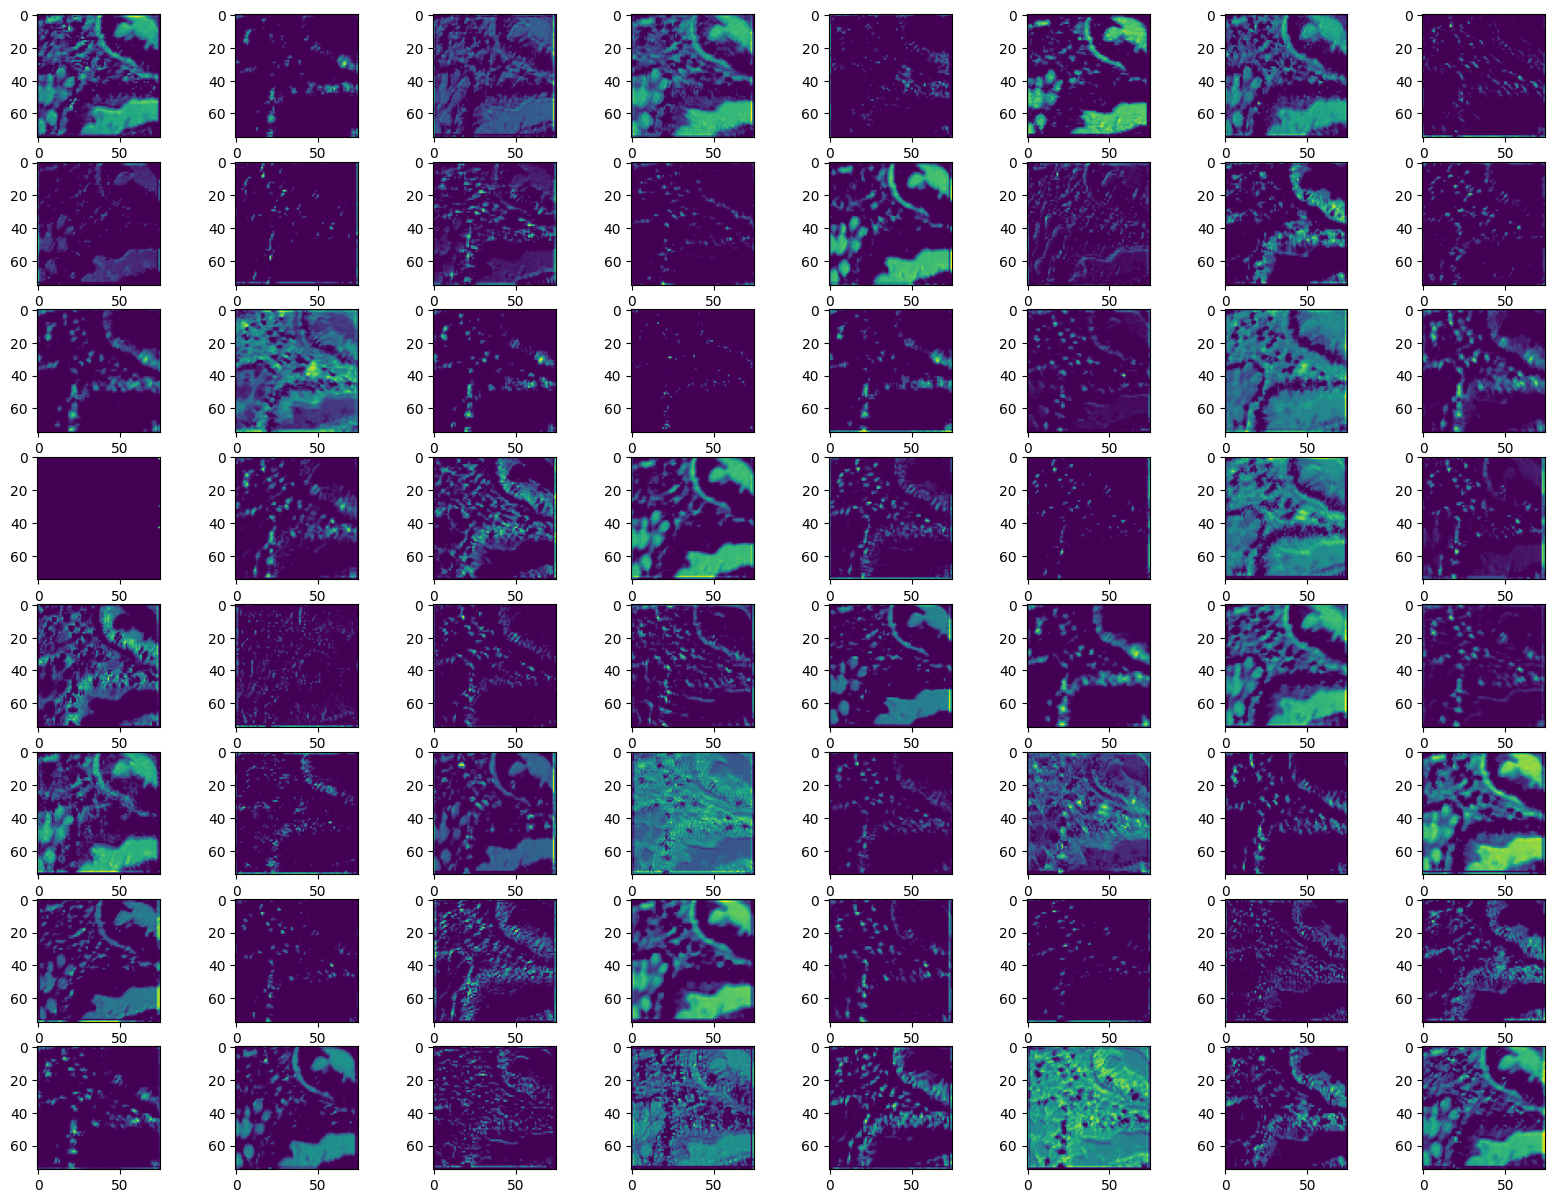

In [28]:
featuresA2 = model2.predict(img1) # 2nd conv - size & shape of cells

fig = plt.figure(figsize=(20,15))

for i in range(1,featuresA2.shape[3]+1):
    plt.subplot(8,8,i)
    plt.imshow(featuresA2[0,:,:,i-1])
    
plt.show()

1/1 [==============================] - 0s 28ms/step


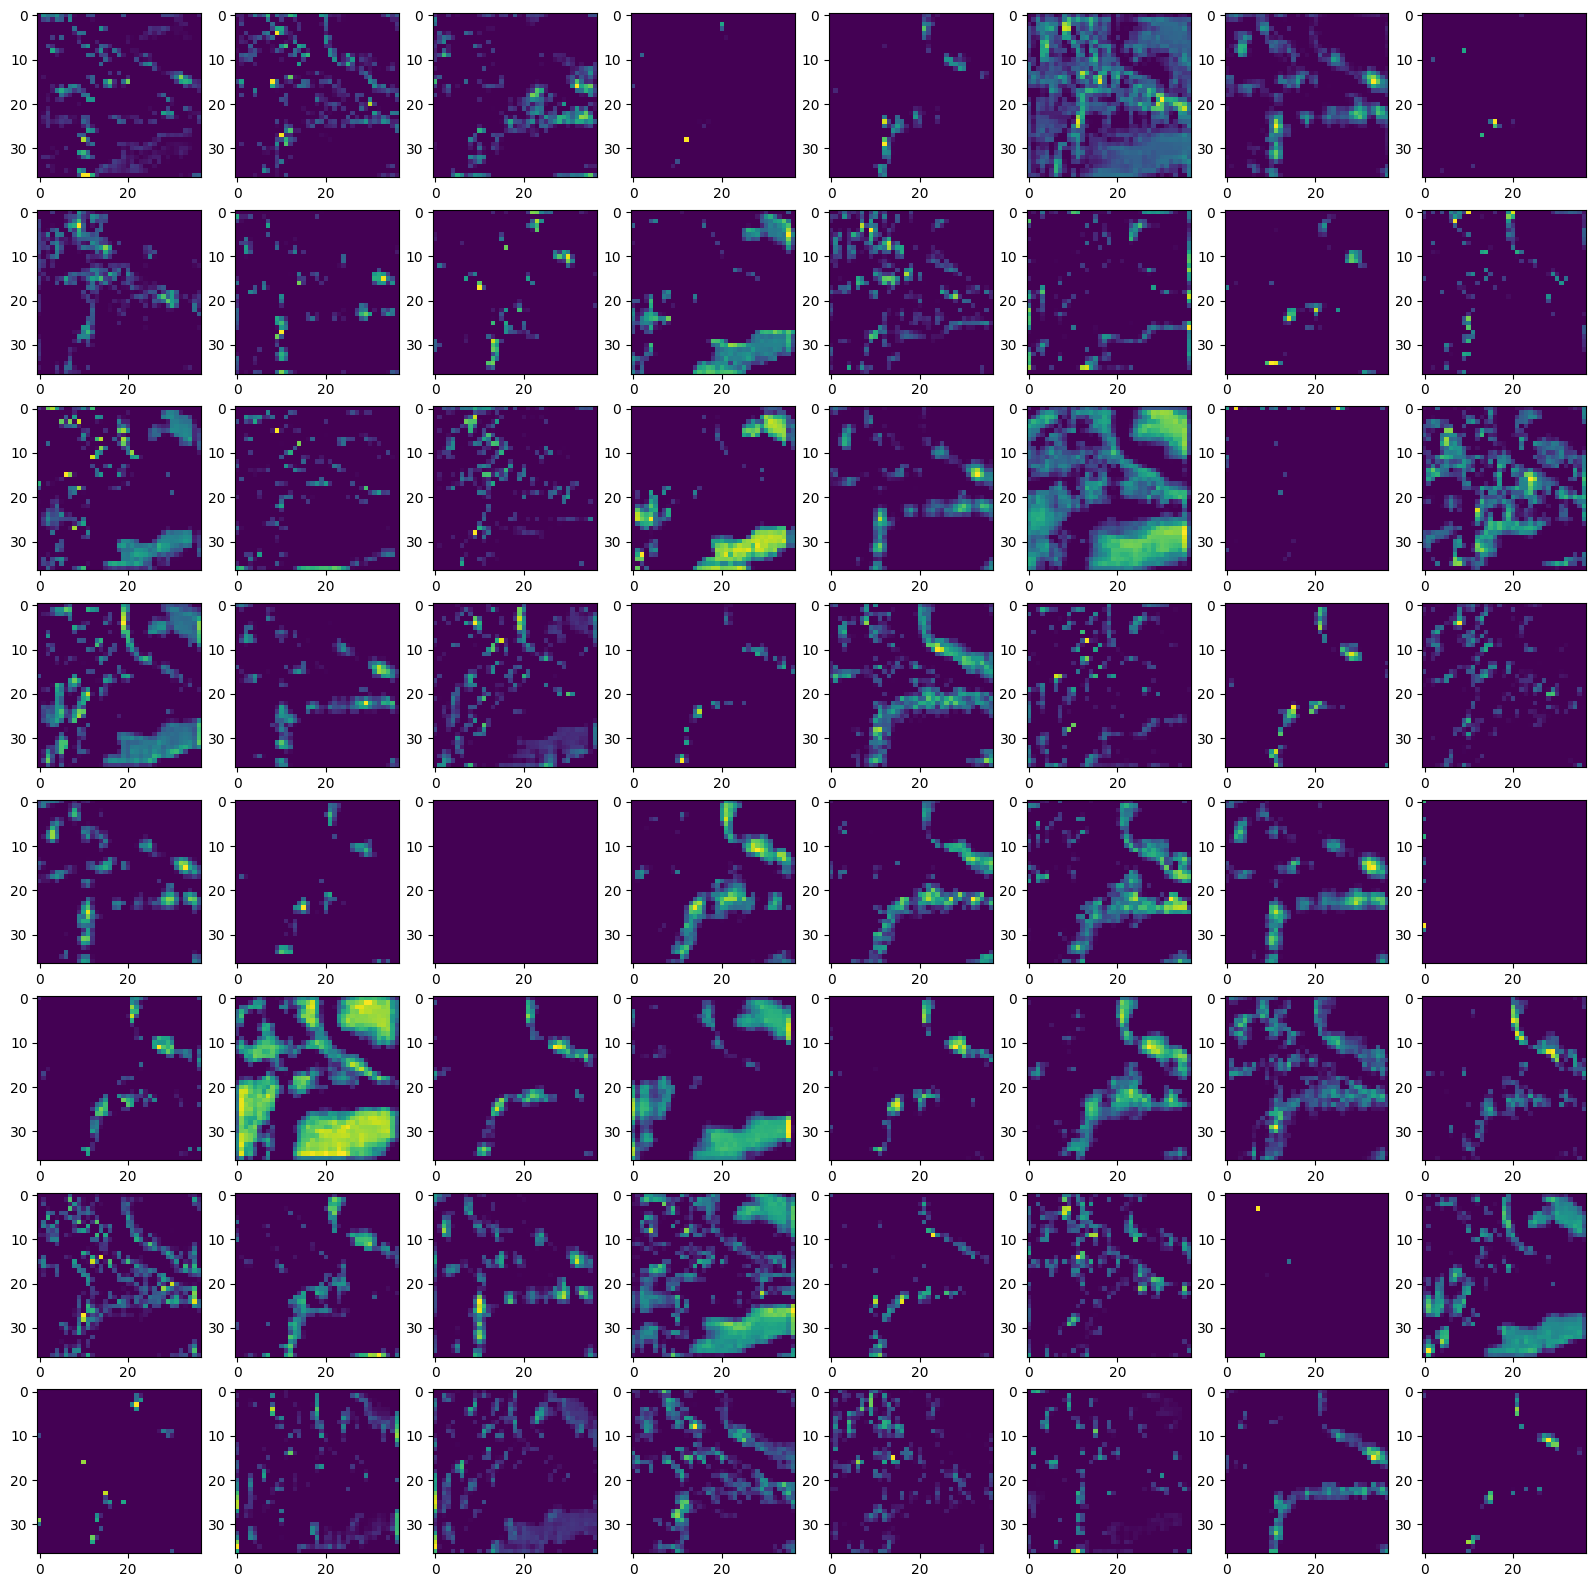

In [29]:
featuresA3 = model3.predict(img1) # 3rd conv - surrounding cell structure?

fig = plt.figure(figsize=(20,20))

for i in range(1,featuresA3.shape[3]+1):
    plt.subplot(8,8,i)
    plt.imshow(featuresA3[0,:,:,i-1])
    
plt.show()

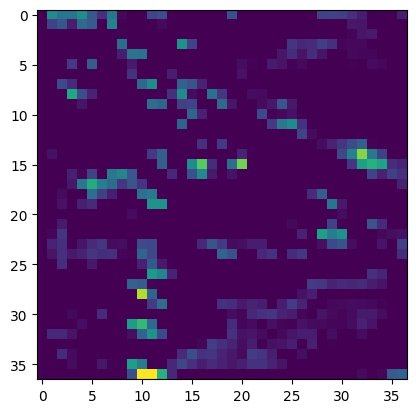

In [30]:
plt.imshow(featuresA3[0,:,:,0]) #- pixel clusters
plt.show()

In [31]:
print(test.class_indices.keys())

dict_keys(['colon_aca', 'colon_n'])


In [33]:
test_labels = []

for i in range(0,1000):
    pred = test[i][1][0]
    if pred[0] > 0.5:
        test_labels.append(0)
    else:
        test_labels.append(1)

In [34]:
print(test_labels)

[1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 

In [35]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

num_classes = 2
predict_test = model.predict(test).argmax(axis=1)
cm = confusion_matrix(test_labels, predict_test)

1000/1000 [==============================] - 13s 13ms/step


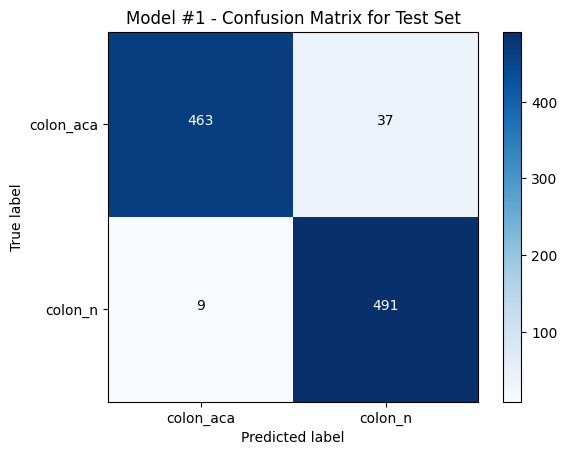

In [36]:
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Model #1 - Confusion Matrix for Test Set")
plt.colorbar()
tick_marks = np.arange(num_classes)

classes = list(test.class_indices.keys())
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes) # number between 0 and 1

threshold = cm.max() / 2

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()